# importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [6]:
#reading file 
df=pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#credit card data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#last 5 rows values
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# finding the skew in dataset

In [7]:
df.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [ ]:
#Box plots help visualize the distribution of quantitative values in a field. 
#They are also valuable for comparisons across different categorical variables or identifying outliers, 
#if either of those exist in a dataset.
#plt.boxplot(df)
#plt.show()

Text(0, 0.5, 'Frequency')

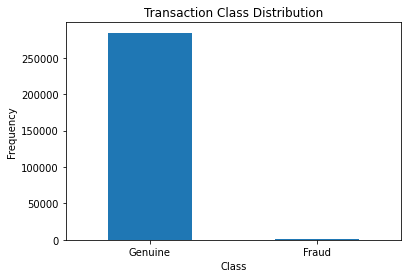

In [8]:
count_class = pd.value_counts(df['Class'], sort = True)
count_class.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS = ["Genuine", "Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")


In [ ]:
#if the value is 0 then it is geniune transaction
#if the value is 1 then it is fradulent transaction


In [ ]:
#checking the missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#distribution of genuine trans and fradulent trans
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
#to find the duplicates values
df.duplicated().sum()

1081

In [ ]:
duplicateRows = df[df.duplicated()]
duplicateRows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [10]:
#removing duplicates values
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()


0

# Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.(minmaxscaler)

In [12]:
#applying min max scalaer
from sklearn.preprocessing import MinMaxScaler


In [13]:
minmax_scale = MinMaxScaler()

minmax_scale
#df[Amount] = minmax_scale.fit_transform([df.Amount])

df['Amount'] = minmax_scale.fit_transform(df[['Amount']])

df['Amount'].head(5)

0    0.005824
1    0.000105
2    0.014739
3    0.004807
4    0.002724
Name: Amount, dtype: float64

In [14]:
df['Amount'].min(), df['Amount'].max() 

(0.0, 1.0)

In [ ]:
df.Amount

0         0.005824
1         0.000105
2         0.014739
3         0.004807
4         0.002724
            ...   
284802    0.000030
284803    0.000965
284804    0.002642
284805    0.000389
284806    0.008446
Name: Amount, Length: 283726, dtype: float64

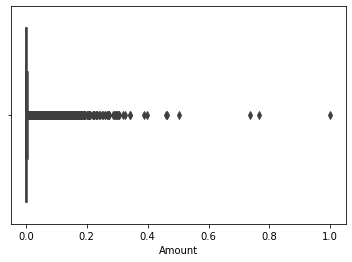

In [ ]:
sns.boxplot(df.Amount)

In [ ]:
plt.boxplot(df)
plt.show()

dropping of my time column(here it is not required so i remove from data set)

In [15]:
df.drop(columns="Time",inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


In [16]:
from scipy.stats import skew

V1
-3.2732539433146486


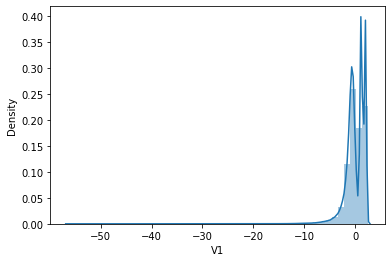

V2
-4.695137078165384


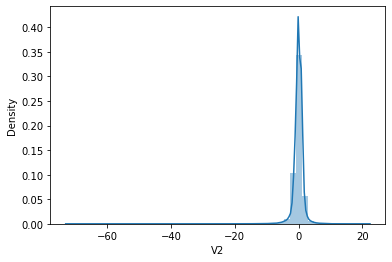

V3
-2.1519725799940685


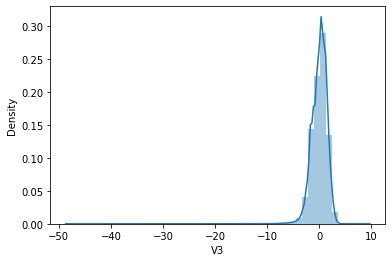

V4
0.6715006205655543


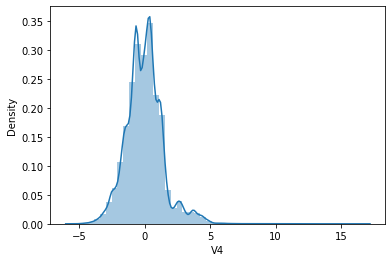

V5
-2.414066484215612


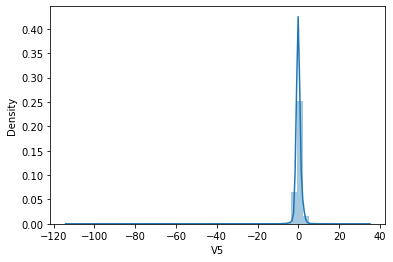

V6
1.829870709562578


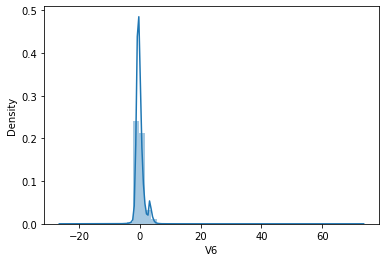

V7
2.8902559124339735


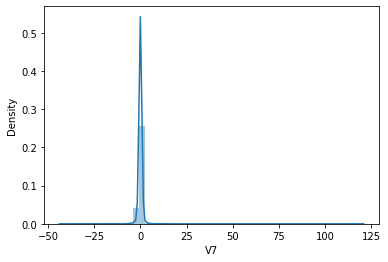

V8
-8.310926391626731


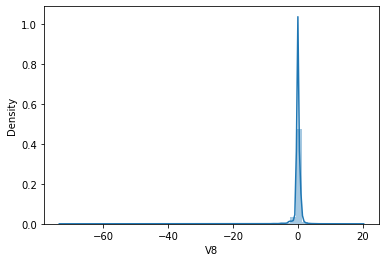

V9
0.5376602109334492


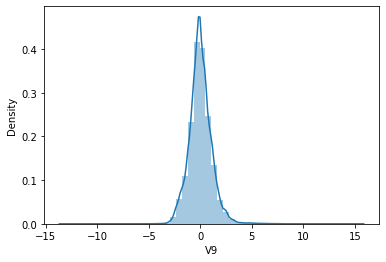

V10
1.2529604545622932


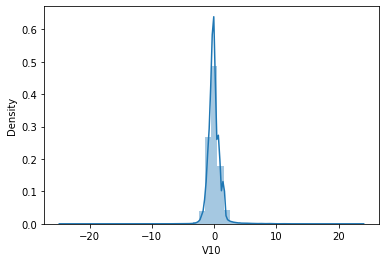

V11
0.34407237420591985


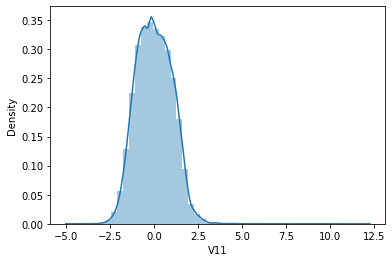

V12
-2.198996655901221


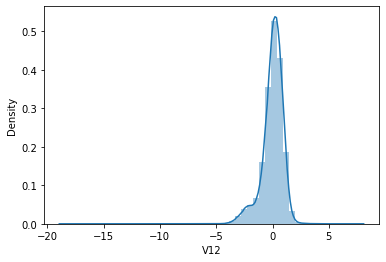

V13
0.06429306473390328


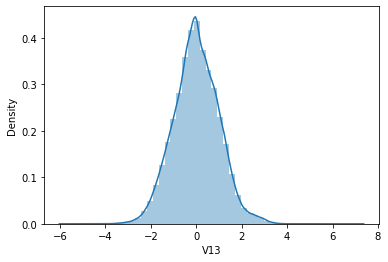

V14
-1.9187935694299705


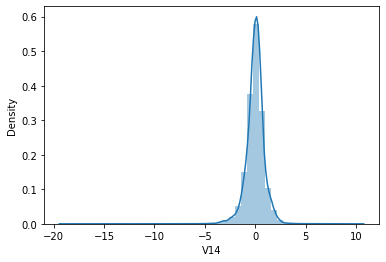

V15
-0.3096574451884751


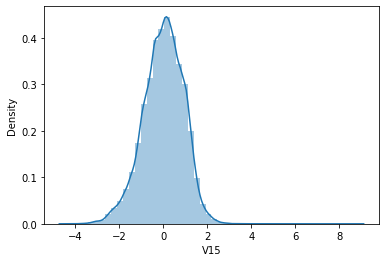

V16
-1.0511559142385323


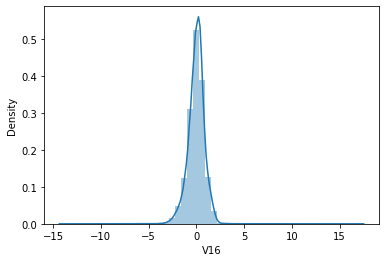

V17
-3.690477683233225


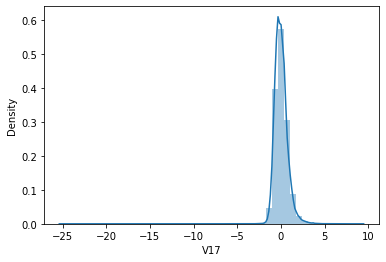

V18
-0.24866014274940992


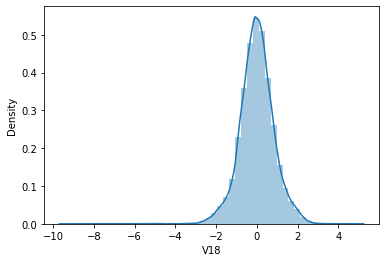

V19
0.1083112383097532


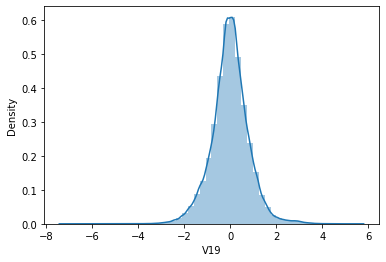

V20
-2.043110254457915


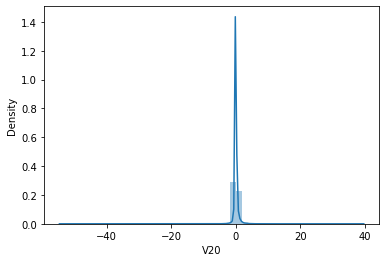

V21
2.8200182046255926


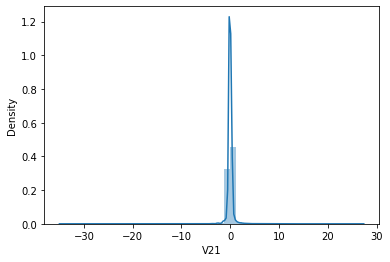

V22
-0.18232876403467282


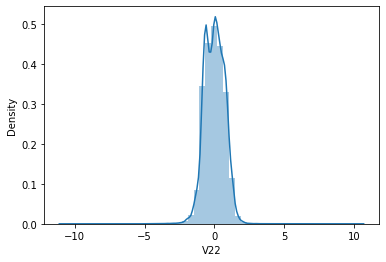

V23
-5.867189772192024


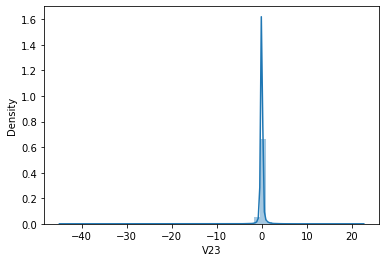

V24
-0.5521263176758532


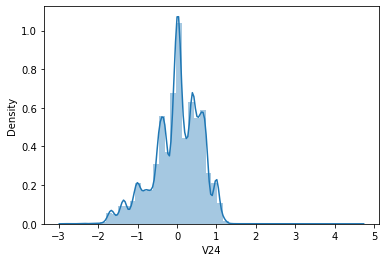

V25
-0.41574166410065255


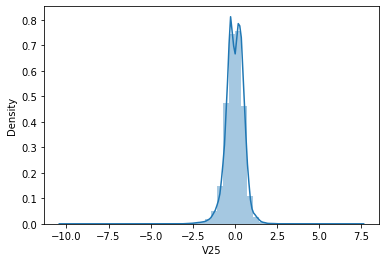

V26
0.5802892493462333


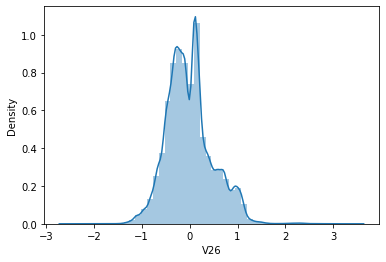

V27
-0.7537999286092231


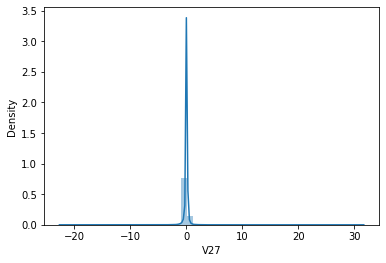

V28
11.555053994631207


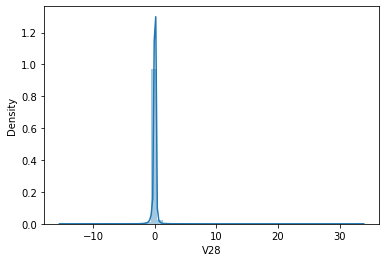

Amount
16.978713606547597


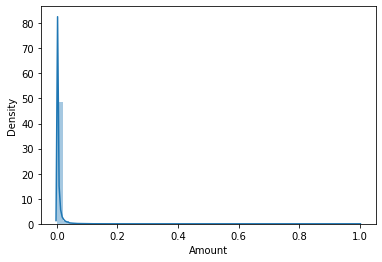

Class
24.430415913002122


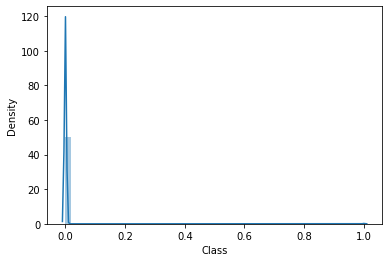

In [ ]:
for col in df:
  print(col)
  print(skew(df[col]))
  plt.figure()
  sns.distplot(df[col])
  plt.show()





# finding the outliers by using z-score value

In [17]:
import scipy.stats as stats
outliers_df = stats.zscore(df)
outliers = outliers_df>3 
print(outliers.sum())


41570


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      283726 non-null  float64
 1   V2      283726 non-null  float64
 2   V3      283726 non-null  float64
 3   V4      283726 non-null  float64
 4   V5      283726 non-null  float64
 5   V6      283726 non-null  float64
 6   V7      283726 non-null  float64
 7   V8      283726 non-null  float64
 8   V9      283726 non-null  float64
 9   V10     283726 non-null  float64
 10  V11     283726 non-null  float64
 11  V12     283726 non-null  float64
 12  V13     283726 non-null  float64
 13  V14     283726 non-null  float64
 14  V15     283726 non-null  float64
 15  V16     283726 non-null  float64
 16  V17     283726 non-null  float64
 17  V18     283726 non-null  float64
 18  V19     283726 non-null  float64
 19  V20     283726 non-null  float64
 20  V21     283726 non-null  float64
 21  V22     28

In [19]:
df2=df["Class"]
df2.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [20]:
df2.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [21]:
df1=df.drop(['Class'],inplace=True,axis=1)
df1=df.copy()

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      283726 non-null  float64
 1   V2      283726 non-null  float64
 2   V3      283726 non-null  float64
 3   V4      283726 non-null  float64
 4   V5      283726 non-null  float64
 5   V6      283726 non-null  float64
 6   V7      283726 non-null  float64
 7   V8      283726 non-null  float64
 8   V9      283726 non-null  float64
 9   V10     283726 non-null  float64
 10  V11     283726 non-null  float64
 11  V12     283726 non-null  float64
 12  V13     283726 non-null  float64
 13  V14     283726 non-null  float64
 14  V15     283726 non-null  float64
 15  V16     283726 non-null  float64
 16  V17     283726 non-null  float64
 17  V18     283726 non-null  float64
 18  V19     283726 non-null  float64
 19  V20     283726 non-null  float64
 20  V21     283726 non-null  float64
 21  V22     28

# New Section

# finding the IQR value using percentiles 

In [23]:
per25=df.quantile(0.25)
per75=df.quantile(0.75)
iqr=per75-per25

# finding the upper_limit and lower_limit value in df

In [24]:
upper_limit=per75+1.5 *iqr
lower_limit=per25-1.5 *iqr

In [25]:
upper_limit

V1        4.664096
V2        2.901188
V3        3.901923
V4        3.124319
V5        2.565290
V6        2.145527
V7        2.254949
V8        1.127502
V9        2.456273
V10       1.937414
V11       2.991422
V12       2.151738
V13       2.629739
V14       1.869438
V15       2.497438
V16       2.009068
V17       1.723321
V18       2.001911
V19       1.830703
V20       0.650222
V21       0.807941
V22       2.134663
V23       0.611926
V24       1.631026
V25       1.352896
V26       1.090798
V27       0.333982
V28       0.274917
Amount    0.007216
dtype: float64

In [26]:
lower_limit

V1       -4.263980
V2       -2.701226
V3       -3.764645
V4       -3.234807
V5       -2.642901
V6       -2.517765
V7       -2.236984
V8       -1.010627
V9       -2.504517
V10      -2.019373
V11      -3.013492
V12      -1.940959
V13      -2.614423
V14      -1.802834
V15      -2.428786
V16      -1.952416
V17      -1.808277
V18      -1.997969
V19      -1.828484
V20      -0.728484
V21      -0.850053
V22      -2.149117
V23      -0.625881
V24      -1.545741
V25      -1.319714
V26      -1.177300
V27      -0.313414
V28      -0.249459
Amount   -0.003981
dtype: float64

In [27]:
iqr

V1        2.232019
V2        1.400603
V3        1.916642
V4        1.589781
V5        1.302048
V6        1.165823
V7        1.122983
V8        0.534532
V9        1.240198
V10       0.989197
V11       1.501228
V12       1.023174
V13       1.311040
V14       0.918068
V15       1.231556
V16       0.990371
V17       0.882899
V18       0.999970
V19       0.914797
V20       0.344676
V21       0.414499
V22       1.070945
V23       0.309452
V24       0.794192
V25       0.668153
V26       0.567025
V27       0.161849
V28       0.131094
Amount    0.002799
dtype: float64

In [28]:
df1.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

# outliers handled using capping method

In [29]:
new_df_cap = df1.copy()
new_df_cap = np.where(new_df_cap> upper_limit,upper_limit,
             np.where(new_df_cap< lower_limit,lower_limit,
             new_df_cap
    )
)

after apply capping method there is no outliers

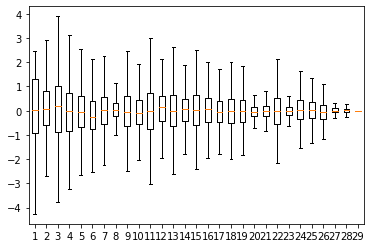

In [ ]:
plt.boxplot(new_df_cap)
plt.show()

In [30]:
new_df_cap

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  5.82379309e-03],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  1.04705276e-04],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  7.21551693e-03],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02,  2.64215395e-03],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  3.89238944e-04],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  7.21551693e-03]])

In [31]:
data=pd.DataFrame(new_df_cap,columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'] )
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.611926,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.007216
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724


In [ ]:
data.head().T

,0,1,2,3,4
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739
V10,0.090794,-0.166974,0.207643,-0.054952,0.753074


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      283726 non-null  float64
 1   V2      283726 non-null  float64
 2   V3      283726 non-null  float64
 3   V4      283726 non-null  float64
 4   V5      283726 non-null  float64
 5   V6      283726 non-null  float64
 6   V7      283726 non-null  float64
 7   V8      283726 non-null  float64
 8   V9      283726 non-null  float64
 9   V10     283726 non-null  float64
 10  V11     283726 non-null  float64
 11  V12     283726 non-null  float64
 12  V13     283726 non-null  float64
 13  V14     283726 non-null  float64
 14  V15     283726 non-null  float64
 15  V16     283726 non-null  float64
 16  V17     283726 non-null  float64
 17  V18     283726 non-null  float64
 18  V19     283726 non-null  float64
 19  V20     283726 non-null  float64
 20  V21     283726 non-null  float64
 21  V22     28

In [32]:
data.skew()

V1       -0.642270
V2       -0.139176
V3       -0.403793
V4        0.184787
V5        0.228502
V6        0.665435
V7       -0.060739
V8        0.151892
V9        0.099859
V10       0.242229
V11       0.104856
V12      -0.569182
V13       0.039082
V14      -0.102652
V15      -0.262597
V16      -0.231331
V17       0.444719
V18       0.011311
V19      -0.036423
V20       0.289852
V21       0.121915
V22      -0.035928
V23       0.062001
V24      -0.543730
V25      -0.156094
V26       0.367262
V27       0.086288
V28      -0.032022
Amount    1.211286
dtype: float64

In [ ]:
#plt.boxplot(data)
#plt.show()

In [ ]:
plt.boxplot(new_df_cap[22])
plt.show()

In [ ]:
df2.skew()

24.430545072372162

In [ ]:
data.shape

(283726, 29)

In [ ]:
new_df_cap.shape

(283726, 29)

In [35]:
data1=pd.concat([data,df2],axis=1)
data1.shape

(284805, 30)

In [ ]:
data1.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
284803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
284804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
284805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
284806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [36]:
data1.isnull().sum()

V1        1079
V2        1079
V3        1079
V4        1079
V5        1079
V6        1079
V7        1079
V8        1079
V9        1079
V10       1079
V11       1079
V12       1079
V13       1079
V14       1079
V15       1079
V16       1079
V17       1079
V18       1079
V19       1079
V20       1079
V21       1079
V22       1079
V23       1079
V24       1079
V25       1079
V26       1079
V27       1079
V28       1079
Amount    1079
Class     1079
dtype: int64

In [37]:
data1.dropna(inplace=True)

In [ ]:
data1.shape

(282647, 30)

In [38]:
data1["Class"].value_counts()

0.0    282174
1.0       473
Name: Class, dtype: int64

V1
-0.6424734278439772


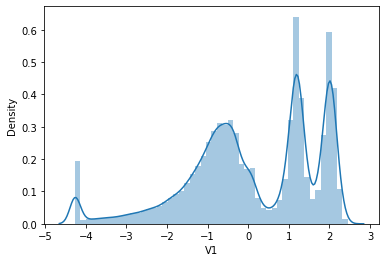

V2
-0.13870633366594007


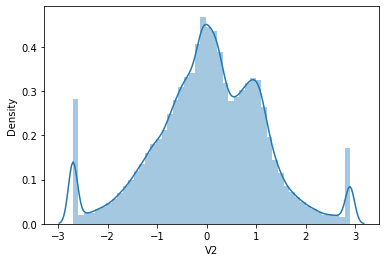

V3
-0.40375762338824844


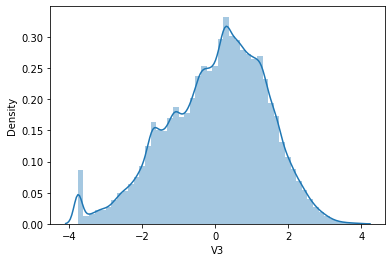

V4
0.1850440547105093


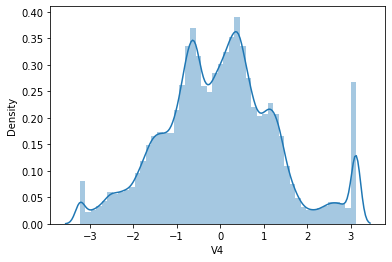

V5
0.22848030670662314


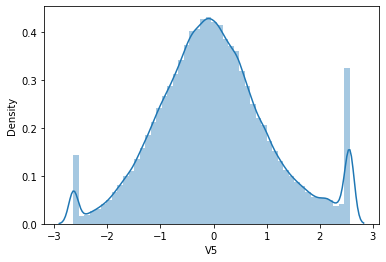

V6
0.6653372972226553


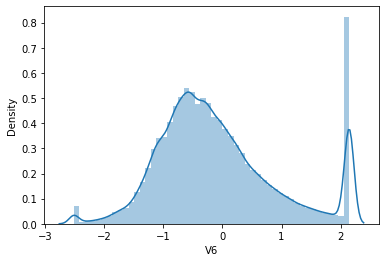

V7
-0.06081261282169199


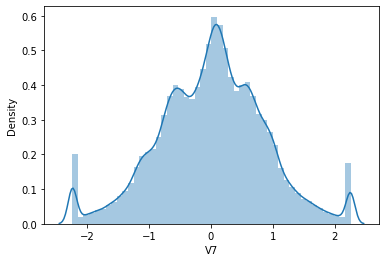

V8
0.15184513776416322


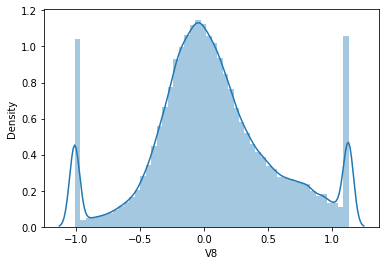

V9
0.09986184235719689


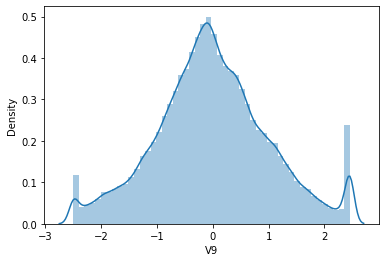

V10
0.24221463125076761


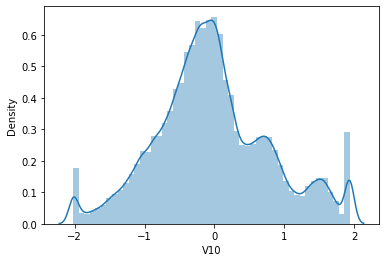

V11
0.10473889971258436


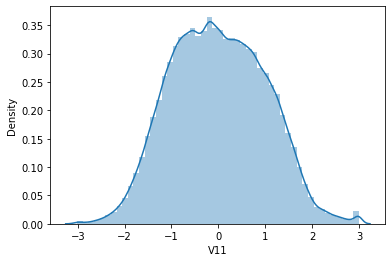

V12
-0.568988581839251


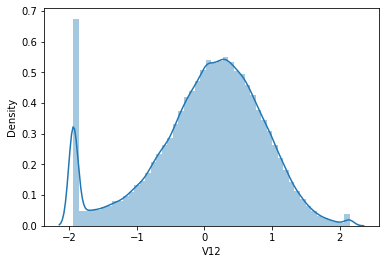

V13
0.0393078114189192


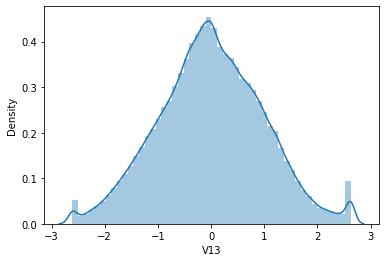

V14
-0.10247110627743108


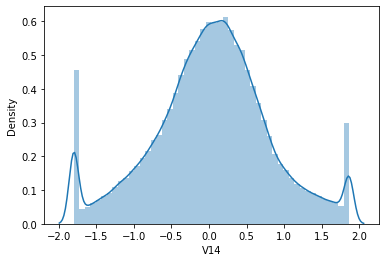

V15
-0.2621133997320873


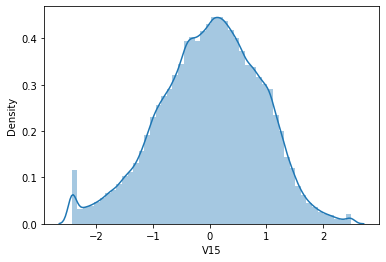

V16
-0.23143606579793102


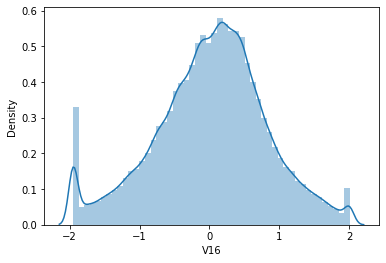

V17
0.4446944354601352


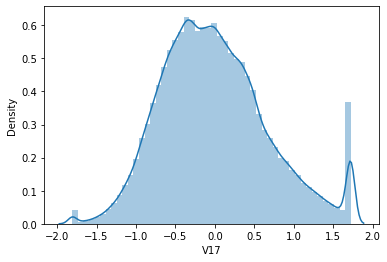

V18
0.01158832148530511


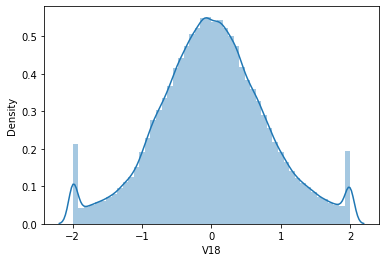

V19
-0.036160077014849405


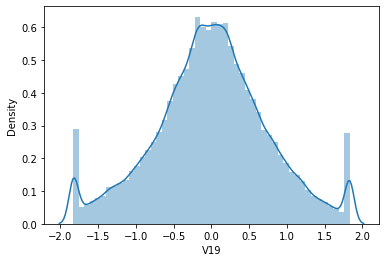

V20
0.289553633872916


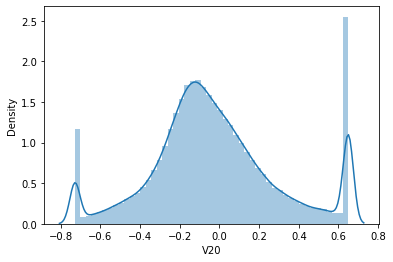

V21
0.1220197860887606


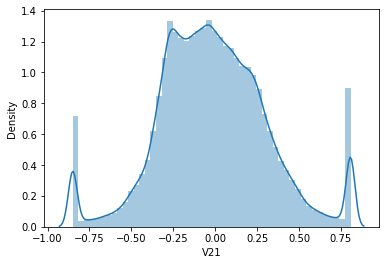

V22
-0.03635754545408622


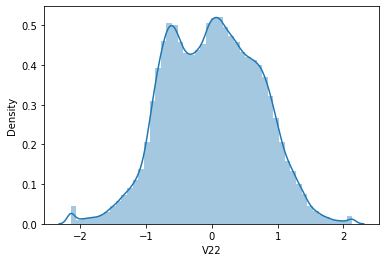

V23
0.062148591602425834


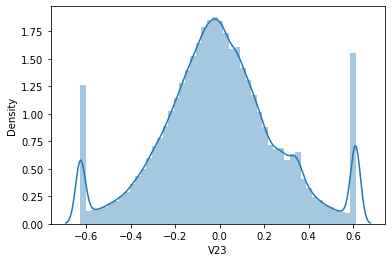

V24
-0.5438561156929024


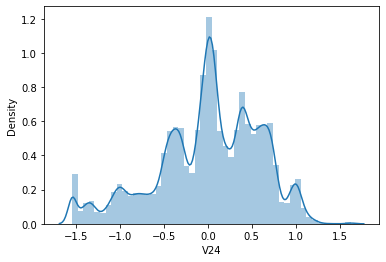

V25
-0.15549007237064977


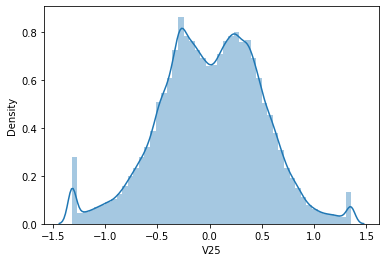

V26
0.36724829673112114


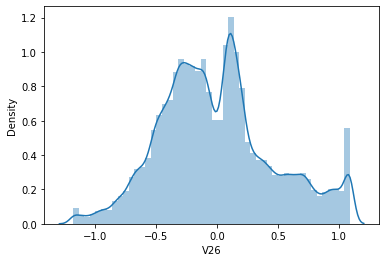

V27
0.08630645783299526


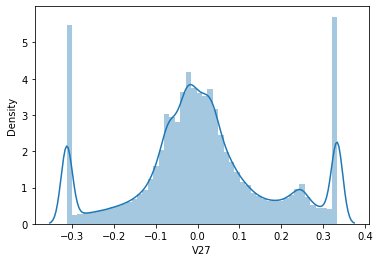

V28
-0.03203375674582289


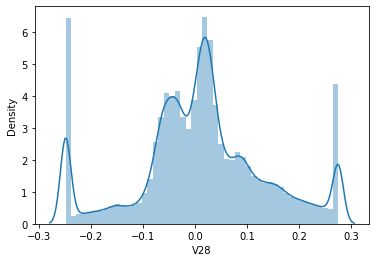

Amount
1.2112212696545328


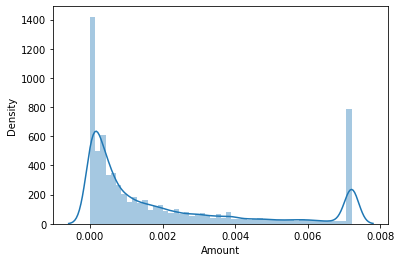

Class
24.38368397382485


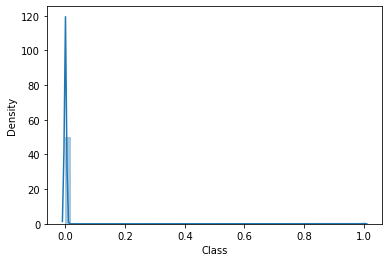

In [ ]:
for col in data1:
  print(col)
  print(skew(data1[col]))
  plt.figure()
  sns.distplot(data1[col])
  plt.show()

In [ ]:
# so the dataset is highly imbalanced
#we can tell this from class variable
 #seperating the data for analysis
    

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.611926,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.007216,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0.0


In [39]:
genuine=data1[data1.Class==0]
fradulent=data1[data1.Class==1]

In [40]:
print(genuine.shape)
print(fradulent.shape)

(282174, 30)
(473, 30)


In [ ]:
 genuine.Amount.describe()

count    282174.000000
mean          0.002020
std           0.002410
min           0.000000
25%           0.000218
50%           0.000856
75%           0.003017
max           0.007216
Name: Amount, dtype: float64

In [ ]:
fradulent.Amount.describe()

count    473.000000
mean       0.001890
std        0.002366
min        0.000000
25%        0.000194
50%        0.000778
75%        0.002688
max        0.007216
Name: Amount, dtype: float64

In [ ]:
#compare the values for both transactions
#df.groupby

In [ ]:

#sns.pairplot(df)

In [41]:
#under sampling
#number of fradulent transactions =473
genuine_sample=genuine.sample(n=473)

In [42]:
#concatenating 2 dataframes
df1=pd.concat([genuine_sample,fradulent],axis=0)

In [ ]:
# to find the diff b/w mean of 2 diff class
df1.groupby('Class').mean()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,0.122566,0.070545,0.103296,-0.08970,0.047334,-0.053072,0.058946,0.073119,0.077368,-0.064054,...,-0.023804,-0.019060,0.012434,0.003478,0.005244,0.008527,-0.025891,0.019186,0.007766,0.001927
1.0,0.021699,0.111031,0.154398,0.05511,0.014937,-0.167342,-0.007642,0.038049,0.225328,-0.137103,...,-0.028782,-0.037047,-0.071271,-0.001923,-0.027555,0.040333,-0.065507,0.015239,0.015186,0.001890


In [43]:
genuine_sample.shape

(473, 30)

In [44]:
genuine_sample.shape,fradulent.shape

((473, 30), (473, 30))

In [45]:
df1.shape

(946, 30)

In [46]:
x=df1.drop(columns="Class",axis=1)
y=df1.Class
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
858,-1.789835,-2.701226,-1.472791,-0.851160,-2.433875,0.401415,1.354543,-0.288283,2.426889,-2.019373,...,0.650222,0.807941,-0.178233,-0.625881,-0.645651,0.112930,-0.726724,-0.184806,0.274917,0.007216
164499,2.101803,-1.210921,-0.803614,-0.892688,-0.976516,-0.283370,-1.056447,0.005442,0.309120,0.746101,...,0.032609,0.312783,0.793682,0.105024,0.481813,-0.145780,-0.106249,-0.011147,-0.038015,0.002335
75082,1.180813,-0.151318,0.735193,0.394006,-0.934757,-0.943678,-0.130194,-0.148228,0.589976,-0.308470,...,-0.042024,-0.287135,-0.721555,0.124742,0.779479,0.147347,0.798827,-0.068182,0.014936,0.001222
172456,0.100954,1.052849,-0.310917,-0.636336,0.968582,-0.570373,0.924165,-0.014114,-0.427219,-0.686379,...,0.068258,-0.274242,-0.637870,0.086085,0.680988,-0.444470,0.084234,0.224175,0.076880,0.000069
95149,1.259127,0.479382,-0.218537,0.909157,0.297386,-0.670512,0.473376,-0.214432,-0.588056,0.201234,...,-0.104658,0.038064,0.158166,-0.203221,0.037220,0.882749,-0.295060,-0.008905,-0.001668,0.000030


In [ ]:
x.shape

(946, 29)

In [ ]:
y.shape

(946,)

In [ ]:
type(y)

pandas.core.series.Series

In [47]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [48]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(756, 29) (190, 29) (756,) (190,)


In [ ]:
#applying model 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



In [52]:
#Logistic Regression
model=LogisticRegression()
model1=KNeighborsClassifier(n_neighbors=3)
model2= DecisionTreeClassifier()
model3=RandomForestClassifier(n_estimators=5,random_state=42,n_jobs=2)

In [53]:
model.fit(X_train,y_train)
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=42)

In [54]:
#performance metrices
#evaluation metrices
#Accuracy score
X_train_prediction=model.predict(X_train)
training_data_accuracy_logistic=accuracy_score(X_train_prediction,y_train)
training_data_accuracy_logistic

0.6507936507936508

In [84]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy_logistic=accuracy_score(y_test,X_test_prediction)
print("accuracy score:",test_data_accuracy_logistic)
#precision score for logitic regression
test_data_precision_logistic=precision_score(y_test,X_test_prediction)
print("precision score:",test_data_precision_logistic)
#recall score
test_data_recall_logistic=recall_score(y_test,X_test_prediction)
print("recall score:",test_data_recall_logistic)

accuracy score: 0.5157894736842106
precision score: 0.5641025641025641
recall score: 0.43137254901960786


In [56]:
#train data for KNN
X_train_prediction=model1.predict(X_train)
training_data_accuracy_KNN=accuracy_score(X_train_prediction,y_train)
training_data_accuracy_KNN

0.791005291005291

In [81]:
X_test_prediction=model1.predict(X_test)
test_data_accuracy_KNN=accuracy_score(X_test_prediction,y_test)
print("accuracy score:",test_data_accuracy_KNN)
#precision score for knn
test_data_precision_KNN=precision_score(X_test_prediction,y_test)
print("precision score:",test_data_precision_KNN)
#recall score
test_data_recall_KNN=recall_score(X_test_prediction,y_test)
print("recall score:",test_data_recall_KNN)



accuracy score: 0.5157894736842106
precision score: 0.49019607843137253
recall score: 0.5555555555555556


In [64]:
X_train_prediction=model2.predict(X_train)
training_data_accuracy_DT=accuracy_score(X_train_prediction,y_train)
training_data_accuracy_DT

1.0

In [80]:
X_test_prediction=model2.predict(X_test)
test_data_accuracy_DT=accuracy_score(X_test_prediction,y_test)
print("accuracy score:",test_data_accuracy_DT)

#precicion score
test_data_precision_DT=precision_score(X_test_prediction,y_test)
print("precision score:",test_data_precision_DT)

#recall score
test_data_recall_DT=recall_score(X_test_prediction,y_test)
print("recall score:",test_data_recall_DT)


accuracy score: 0.5263157894736842
precision score: 0.5392156862745098
recall score: 0.5612244897959183


In [69]:
#train data for random forest
X_train_prediction=model3.predict(X_train)
training_data_accuracy_RF=accuracy_score(X_train_prediction,y_train)
training_data_accuracy_RF

0.9563492063492064

In [79]:
X_test_prediction=model3.predict(X_test)
test_data_accuracy_RF=accuracy_score(X_test_prediction,y_test)
print("accuracy score:",test_data_accuracy)

#precision score
test_data_precision_RF=precision_score(X_test_prediction,y_test)
print("precision score:",test_data_precision_DT)

#recall score
test_data_recall_RF=recall_score(X_test_prediction,y_test)
print("recall score:",test_data_recall_DT)


accuracy score: 0.47058823529411764
precision score: 0.5392156862745098
recall score: 0.5612244897959183


In [85]:

Models = ['Logistic Regression','KNN','Decision Tree','Random Forest']
train_accuracy = [training_data_accuracy_logistic,training_data_accuracy_KNN,training_data_accuracy_DT,training_data_accuracy_RF]
test_accuracy = [test_data_accuracy_logistic,test_data_accuracy_KNN,test_data_accuracy_DT,test_data_accuracy_RF]
precision_score = [test_data_precision_logistic,test_data_precision_KNN,test_data_accuracy_DT,test_data_precision_RF]
recall_score = [test_data_recall_logistic,test_data_recall_KNN,test_data_recall_DT,test_data_recall_RF]


score = {'Model': Models, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Recall Score':recall_score,'Precision Score':precision_score}
df = pd.DataFrame(score)
df





,Model,Train Accuracy,Test Accuracy,Recall Score,Precision Score
0,Logistic Regression,0.650794,0.515789,0.431373,0.564103
1,KNN,0.791005,0.515789,0.555556,0.490196
2,Decision Tree,1.000000,0.526316,0.561224,0.526316
3,Random Forest,0.956349,0.536842,0.585366,0.470588


In [ ]:
#applying random forest algorithm
